In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [66]:
cancer_df = pd.read_csv('breast-cancer.csv')
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [67]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [68]:
cancer_df.shape 
# so the shape matches the amount of non-null counts so overall clean dataset in that regard

(569, 32)

In [69]:
cancer_df.isnull().sum() #confirm no null values

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [70]:
# we dont need ID so get rid of that column
cancer_df = cancer_df.drop(columns=['id'])
# need to convert M and B to 0 and 1
one_hot_cancer_df = pd.get_dummies(cancer_df, columns=['diagnosis'], drop_first=True)
# deceided to drop the first column for B as if its not M then it is B and the goal is to determine what make it M

In [71]:
one_hot_cancer_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


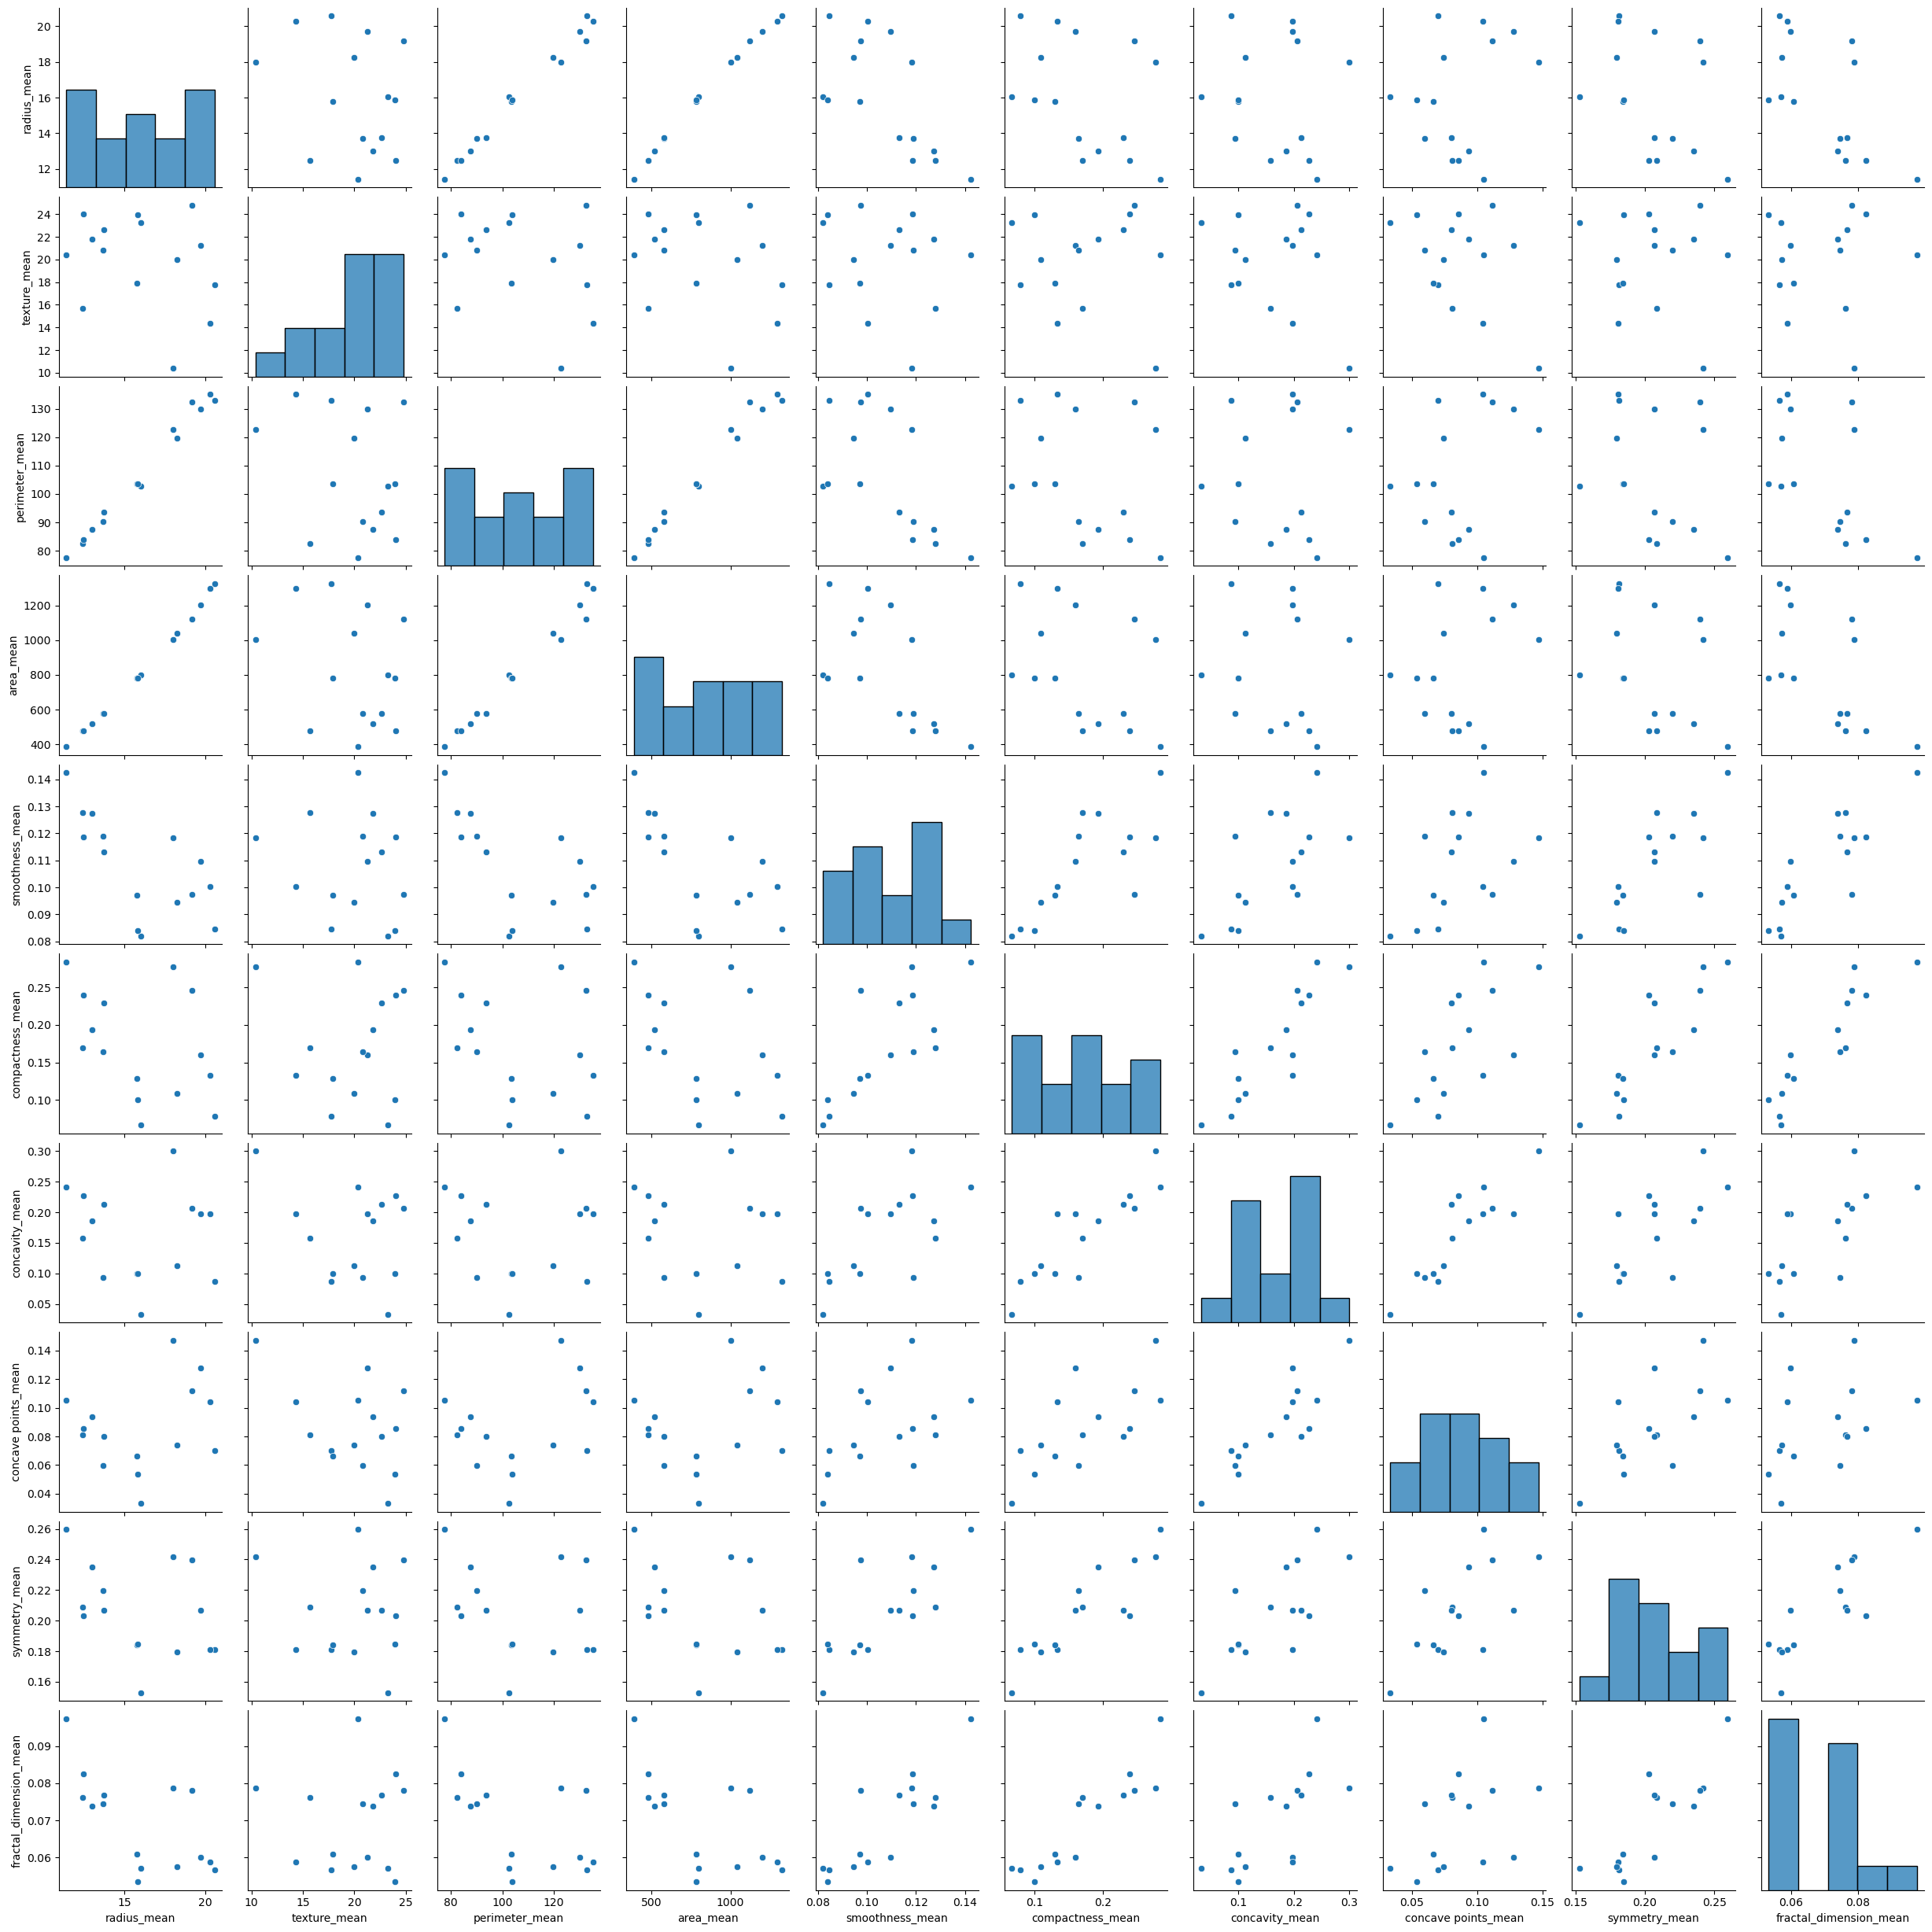

In [72]:
# great cleaning is done, lets do a quick visualiztion using pairplot
sns.pairplot(one_hot_cancer_df.iloc[:15, :10]) #using a small sample of data since the full data set takes a long time. 


In [73]:
from sklearn.model_selection import train_test_split
# now we train the data
X = one_hot_cancer_df.drop(columns=['diagnosis_M']) #all of our feautures
y =  one_hot_cancer_df['diagnosis_M'] #are target is the diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

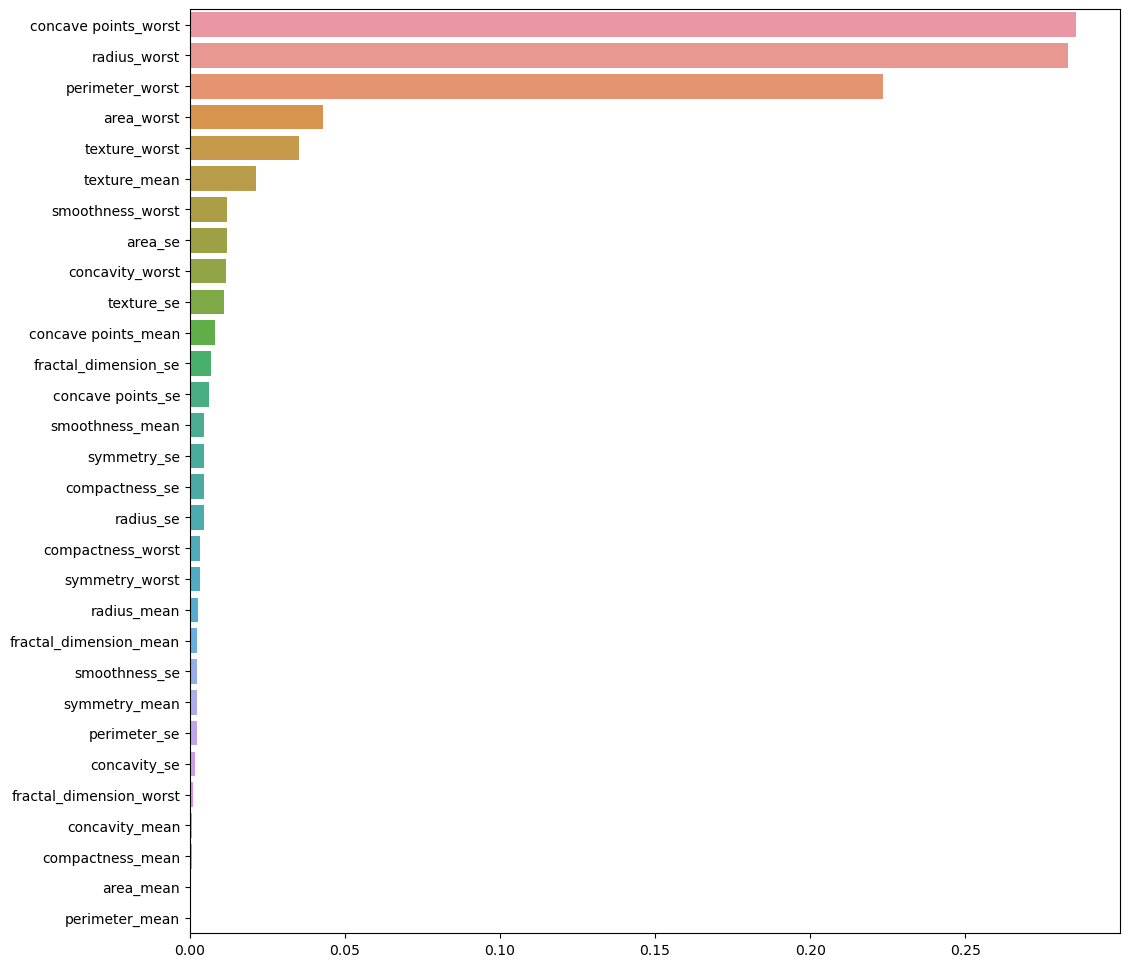

In [74]:
# since the target is either cancer or not cancer, and its a simple binary calssification I decided a simple tree model would be best.
from sklearn.model_selection import cross_validate
from sklearn import tree
from sklearn import metrics
import numpy as np

classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X_train, y_train)
cross = cross_validate(classifier, X, y, cv=10, return_estimator=True)

# get the most important features 
feature_importance = [list(estimator.feature_importances_) for estimator in cross['estimator']]
feature_importance_avg = pd.Series(np.mean(feature_importance, axis=0), index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 12))
sns.barplot(x=feature_importance_avg, y=feature_importance_avg.index, )
plt.show()


In [80]:
# wow that looks like a lot of these metric are not significant
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (20,20), dpi=600)
tree.plot_tree(decision_tree=classifier, feature_names=X.columns.tolist(), filled=True)
plt.show()

In [83]:
# cool how accusrate is it though?
predecited = classifier.predict(X_test)
print(metrics.classification_report(y_test, predecited))

# oh thats cool, the model is fairly even in determining cancerous vs non cancerous tumors based on traits of the tumor.

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        75
           1       0.87      0.87      0.87        39

    accuracy                           0.91       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114

